#                               App_Store Clustering 

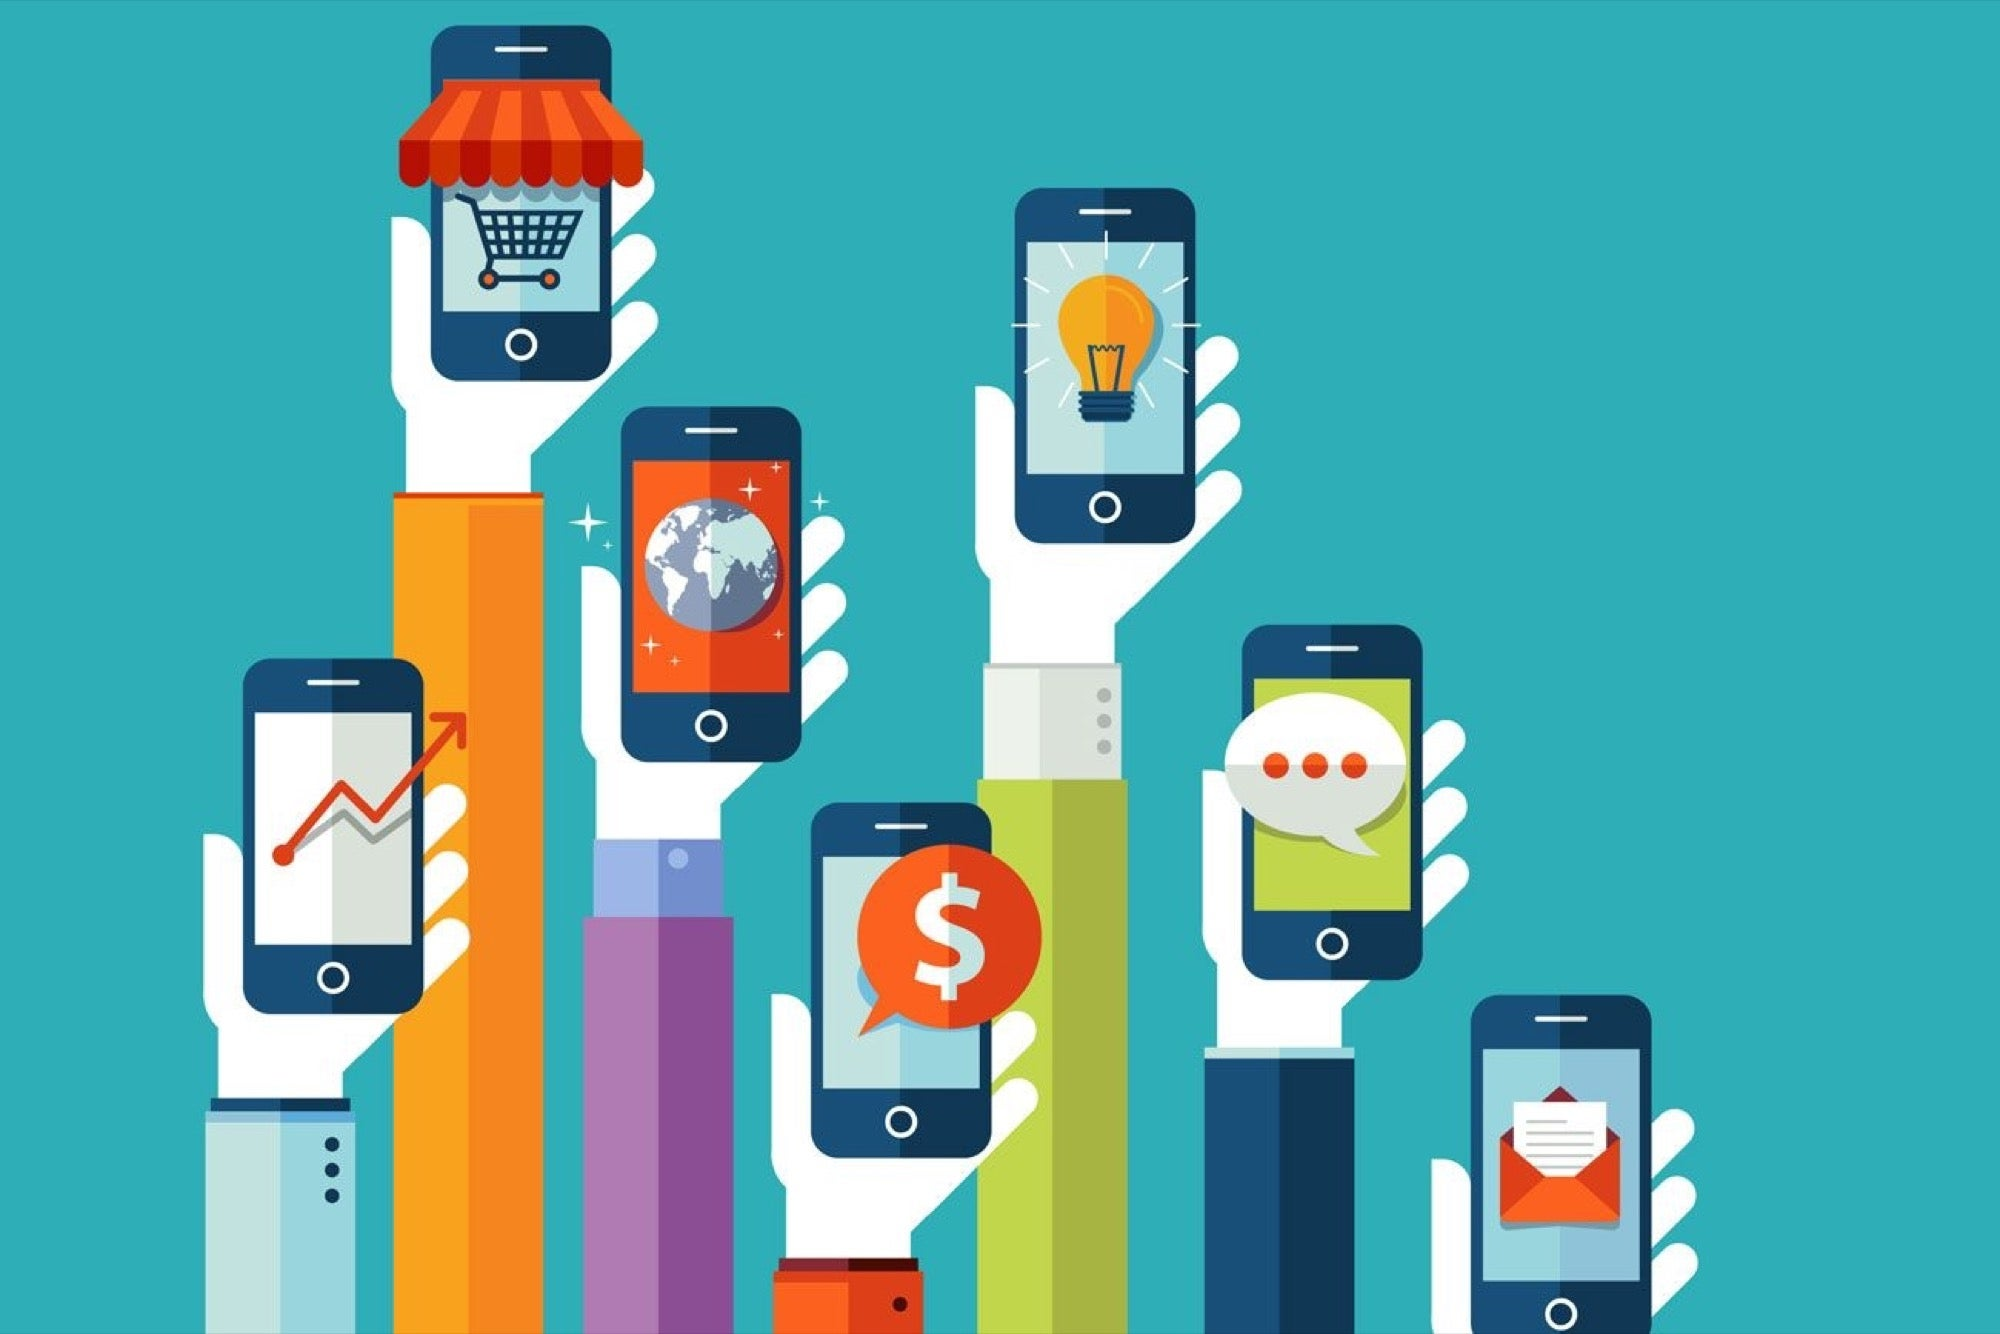

## Data description

| Column Name | Description |
| --- | --- |
| id | App ID |
| track_name | App Name |
| size_bytes | Size in bytes |
| currency | Currency Type |
| price | Price ammount |
| ratingcounttot | User Rating counts (for all versions) |
| ratingcountver | User Rating counts (for current version) |
| user_rating | Average User Rating value (for all versions) |
| userratingver | Average User Rating value (for current version) |
| ver | Latest version code |
| cont_rating | Content Rating |
| prime_genre | Primary Genre |
| sup_devices.num | Number of supporting devices |
| ipadSc_urls.num | Number of screenshots showed for display |
| lang.num | Number of supported languages |
| vpp_lic | Vpp Device Based Licensing Enabled |

# Important Libraries

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")
!pip3 install ppscore
import ppscore as pps
#Import Library RobustScaler
from sklearn.preprocessing import RobustScaler
#Cluster Model
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score

# Read Data

In [ ]:
#load_data
data = pd.read_csv('../input/app-store-apple-data-set-10k-apps/AppleStore.csv' ,sep =',' , encoding = 'utf8' )
data.head()

In [ ]:
#drop column (Unnamed) as semiler ID column
data.drop(['Unnamed: 0'], axis=1 ,inplace=True)
#show data after drop
data.head(2)

In [ ]:
#data about data
data.info()

data has float64(for 3 columns) , int64(8 columns), object(5 columns)

will Apply encoding for object columns 

In [ ]:
#show shape of data 7197 Row and 16 columns
data.shape

In [ ]:
data.isnull().sum().sum()
#not found null data

In [ ]:
data.currency.value_counts()
#All of Apps has same currency paid

In [ ]:
data.nunique()
#target maybe vpp_lic

# Exploratory Data Analaysis

# How do you visualize price distribution of paid apps ?

In [ ]:
data.price.value_counts()
#4056 free apps
#another apps is paid

In [ ]:
sns.distplot(data.price)

In [ ]:
free_apps = data[(data.price==0.00)]

paid_apps  = data[(data.price>0)]

In [ ]:
free_apps.head(2)

In [ ]:
paid_apps.head(2)

In [ ]:
paid_apps.price.value_counts()

**The number of apps decreases with increasing his price**

In [ ]:
free_apps.price.value_counts()

In [ ]:
sns.distplot(free_apps['price'])

In [ ]:
sns.distplot(paid_apps['price'])

In [ ]:
sns.histplot(paid_apps['price'])

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(6,4))

plt.subplot(2,1,2)
plt.title('Visual price distribution')
sns.stripplot(data=paid_apps,y='price',jitter= True,orient = 'h' ,size=6)
plt.show()

**from this graph The number of apps that have a price greater than 50 is few compared to before 50 USD**

In [ ]:
Top_Apps=paid_apps[paid_apps.price>50][['track_name','price','prime_genre','user_rating']]
Top_Apps
#7 Top apps with price, prime_genre and user rating

**Top 7 apps on the basis of price**

In [ ]:
#Function for visualizaiton
def visualizer(x, y, plot_type, title, xlabel, ylabel, rotation=False, rotation_value=60, figsize=(15,8)):
    plt.figure(figsize=figsize)
    
    if plot_type == "bar":  
        sns.barplot(x=x, y=y)
    elif plot_type == "count":  
        sns.countplot(x)
   
    plt.title(title, fontsize=20)
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel(ylabel, fontsize=18)
    plt.yticks(fontsize=13)
    if rotation == True:
        plt.xticks(fontsize=13,rotation=rotation_value)
    plt.show()

In [ ]:
Top_Apps = Top_Apps.sort_values('price', ascending=False)

visualizer(Top_Apps.price,Top_Apps.track_name, "bar", "TOP 7 APPS ON THE BASIS OF PRICE","Price (in USD)","APP NAME")
#names of track in y axis to be readable

In [ ]:
paid_apps.head(2)

In [ ]:
#sum of all paid apps 
sum_paid = paid_apps.price.value_counts().sum()
sum_paid

In [ ]:
#sum of all free apps
sum_free = free_apps.price.value_counts().sum()
sum_free

# How does the price distribution get affected by category ?

In [ ]:
data.prime_genre.value_counts()

**Top app category is Games Games  # is 3862 and Entertainment # is 535**

In [ ]:
data.head()

In [ ]:
new_data_cate = data.groupby([data.prime_genre])[['id']].count().reset_index().sort_values('id' ,ascending = False)
new_data_cate.columns = ['prime_genre','# of Apps']
new_data_cate.head()
#Categories and number of apps in each category

In [ ]:
#Top_Categories accorrding number of apps
new_data_cate.head(10)

In [ ]:
sns.barplot(y = 'prime_genre',x = '# of Apps', data=new_data_cate.head(10))

In [ ]:
#Lower Categories according number of apps Categories unpopular
new_data_cate.tail(10)

In [ ]:
sns.barplot(x= '# of Apps' , y = 'prime_genre' , data = new_data_cate.tail(10))

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(y=paid_apps.prime_genre ,x=paid_apps.price,c='DarkBlue')
plt.title('Price & Category')
plt.xlabel('Price')
plt.ylabel('Category')
plt.show()

* Top Price in important Category (Business , Navigation , Education , Productivity )
* in another side price for all of apps less than 50 USD
* Education Apps has a higher price 
* Shopping Apps has a lower price

# What about paid apps Vs Free apps ?

In [ ]:
free_apps.head(2)

In [ ]:
paid_apps.head(2)

In [ ]:
names = ['sum_free', 'sum_paid']
values = [sum_free, sum_paid]
plt.figure(figsize=(3, 3))
plt.suptitle('Count of free and paid apps')
plt.bar(names, values)
plt.show()

**count of paid apps less than count of free apps**

In [ ]:
print('number of Catigories in free apps is' ,  len(free_apps.prime_genre.value_counts().index))
print('number of Catigories in paid apps is' ,  len(paid_apps.prime_genre.value_counts().index))
#all categories has free & paid apps

In [ ]:
free_apps.head()

In [ ]:
free = free_apps.prime_genre.value_counts().sort_index().to_frame()
paid = paid_apps.prime_genre.value_counts().sort_index().to_frame()
total = data.prime_genre.value_counts().sort_index().to_frame()
free.columns=['free']
paid.columns=['paid']
total.columns=['total']
fig  =free.join(paid).join(total)
fig['%paid'] = fig.paid*100 /fig.total
fig['%free'] = fig.free*100/ fig.total
fig

In general # of Free apps greater than # of paid apps 
but in (Business , Education ,Health ,Fitness,Medical,Music,Navigation ,Photo & Video,Productivity,Reference,Utilities,Weather)
#of paid apps greater than # of free apps

In [ ]:
# for pie chart
pies = fig[['%free','%paid']].head()
pies.columns=['free %','paid %']


In [ ]:
plt.figure(figsize=(15,10))
pies.T.plot.pie(subplots=True,figsize=(20,4),colors=['#D62598','#FBDD7A'],autopct = '%1.0f%%')
plt.show()

Cataloge has Higher # of Free-Apps 

Education has Higher # of Paid-Apps

# Are paid apps good enough ?

In [ ]:
data[data['rating_count_tot']==data['rating_count_tot'].max()]
#Most rated & highest total rating for all version app:


In [ ]:
sns.set_style('white')
sns.violinplot(x=paid_apps['user_rating'],color='#D62598')
plt.xlim(0,5)
plt.xlabel('Rating (0 to 5 stars)')
_ = plt.title('Distribution of App Ratings')

In [ ]:
paid_apps.cont_rating.value_counts()

In [ ]:
bins = (0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5)
plt.style.use('seaborn-white')
plt.hist(paid_apps[paid_apps['cont_rating']=='4+']['user_rating'],alpha=.8,bins=bins,color='purple')
plt.xticks((0,1,2,3,4,5))
plt.title('User Ratings (4+)')
plt.xlabel('Rating')
plt.ylabel('Frequency')
_ = plt.xlim(right=5.5)

Rating of paid Apps between 3.5 - 5

maybe say is good paid apps

In [ ]:
visualizer(paid_apps['user_rating'],paid_apps.prime_genre, "bar", "User-Rating in All Categories","User_Rating","Categories")

higher Rating in Shopping & Catalogs

In [ ]:
Top_Apps = Top_Apps.sort_values('price', ascending=False)

visualizer(Top_Apps.user_rating,Top_Apps.track_name, "bar", "TOP 7 APPS ON THE BASIS OF PRICE With User-Rating","User_Rating","APP NAME")
#names of track in y axis to be readable

apps has high price also has high user-rating acording for that paid apps is good enough

In [ ]:
Lower_Apps=paid_apps[paid_apps.price<=50][['track_name','price','prime_genre','user_rating']]
Lower_Apps.head()

lower_apps in price also has high user-rating so paid apps is good

In [ ]:
Lower_Apps = Lower_Apps.sort_values('price', ascending=True)
lower = Lower_Apps.head()
visualizer(lower.user_rating,lower.track_name, "bar", "Lower 5 APPS ON THE BASIS OF PRICE With User-Rating","User_Rating","APP NAME")

In [ ]:
numCol = paid_apps[['rating_count_tot', 'user_rating', 'sup_devices.num', 'price','lang.num', 'prime_genre']]
sns.pairplot(data = numCol, hue='prime_genre',palette='Set1')

# As the size of the app increases do they get pricier ?

In [ ]:
plt.style.use('seaborn-white')
plt.scatter(data['size_bytes'],data['price'])
plt.title('Byte Size vs. Price')
plt.xlabel('Size (Bytes)')
plt.ylabel('Price')
plt.xlim(0)

size of App not corelated with price 

we show that if size is big ,price is low

the value of an app to the user isn't necessarily related to its size.

# How are the apps distributed category wise ? Can we split by paid category ?

In [ ]:
# lets plot
plt.plot(x)

In [ ]:
#again need to expand
plt.figure(figsize=(12,5))
plt.plot(x, 'ro')
plt.xticks(rotation=90)
plt.show()

High Rating with catalogs , shopping

Low rating in social networking

In [ ]:
# for x
plt.figure(figsize=(16,5))
plt.plot(x, 'ro')
plt.xticks(rotation=90)
plt.title('Category wise rating')
plt.xlabel('Categories')
plt.ylabel('Rating')
plt.show()

In [ ]:
# for Y
plt.figure(figsize=(16,5))
plt.plot(y, 'r--')
plt.xticks(rotation=90)
plt.title('Category wise pricing')
plt.xlabel('Categories')
plt.ylabel('Prices')
plt.show()

In [ ]:
# reducing the number of categories to 5 categories

s = data.prime_genre.value_counts().index[:4]
def categ(x):
    if x in s:
        return x
    else : 
        return "Others"

data['broad_genre']= data.prime_genre.apply(lambda x : categ(x))

In [ ]:
data['broad_genre'].value_counts()

In [ ]:
BlueOrangeWapang = ['#fc910d','#f5ed05','#09ed52','#ed3b09','#e01bda']
plt.figure(figsize=(15,15))
label_names=data.broad_genre.value_counts().sort_index().index
size = data.broad_genre.value_counts().sort_index().tolist()

my_circle=plt.Circle( (0,0), 0.5, color='white')
plt.pie(size, labels=label_names, colors=BlueOrangeWapang ,autopct = '%1.0f%%',)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
free = data[data.price==0].broad_genre.value_counts().sort_index().to_frame()
paid = data[data.price>0].broad_genre.value_counts().sort_index().to_frame()
total = data.broad_genre.value_counts().sort_index().to_frame()
free.columns=['free']
paid.columns=['paid']
total.columns=['total']
five_ca  =free.join(paid).join(total)
five_ca['Paid_per'] = five_ca.paid*100 /five_ca.total
five_ca['Free_per'] = five_ca.free*100/ five_ca.total
five_ca

In [ ]:
plt.figure(figsize=(15,15))
f=pd.DataFrame(index=np.arange(0,10,2),data=five_ca['free'].values,columns=['num'])
p=pd.DataFrame(index=np.arange(1,11,2),data=five_ca['paid'].values,columns=['num'])
final = pd.concat([f,p],names=['labels']).sort_index()
final.num.tolist()

plt.figure(figsize=(25,25))
group_names=data.broad_genre.value_counts().sort_index().index
group_size=data.broad_genre.value_counts().sort_index().tolist()
h = ['Free', 'Paid']
subgroup_names= 5*h
sub= ['#45cea2','#fdd470']
subcolors= 5*sub
subgroup_size=final.num.tolist()


# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=2.5, labels=group_names, colors=BlueOrangeWapang)
plt.setp( mypie, width=1.2, edgecolor='white')

# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.6, labels=subgroup_names, labeldistance=0.7, colors=subcolors)
plt.setp( mypie2, width=0.8, edgecolor='white')
plt.margins(0,0)

# show it
plt.show()

In [ ]:
paid_apps.plot(kind='density' , subplots=True , layout=(4,4) , sharex=False ,
          fontsize=8 , figsize=(10,10))
plt.tight_layout()

In [ ]:
data.plot(kind='density' , subplots=True , layout=(4,4) , sharex=False ,
          fontsize=8 , figsize=(10,10))
plt.tight_layout()

In [ ]:
data.rating_count_tot.value_counts()

In [ ]:
free_apps.vpp_lic.value_counts()

In [ ]:
paid_apps.vpp_lic.value_counts()

In [ ]:
data.vpp_lic.value_counts()

In [ ]:
sns.histplot(data['lang.num'])

# Feature Engineering

In [ ]:
from sklearn.preprocessing import LabelEncoder
USD_LABEL =  LabelEncoder()
data['currency']= USD_LABEL.fit_transform(data['currency'])

In [ ]:
data.drop(['broad_genre'] ,
          #['currency'],
          axis = 1, inplace = True)

In [ ]:
data.drop(['currency'],
          axis = 1, inplace = True)

In [ ]:
data.info()

In [ ]:
#encoding object columns int
track_name_LABEL =  LabelEncoder()
data['track_name']= track_name_LABEL.fit_transform(data['track_name'])

In [ ]:
ver_LABEL =  LabelEncoder()
data['ver']= ver_LABEL.fit_transform(data['ver'])

prime_genre_LABEL =  LabelEncoder()
data['prime_genre']= prime_genre_LABEL.fit_transform(data['prime_genre'])


cont_rating_LABEL =  LabelEncoder()
data['cont_rating']= cont_rating_LABEL.fit_transform(data['cont_rating'])

In [ ]:
data.head()

In [ ]:
data.drop(['id'] , axis =1 , inplace = True)

In [ ]:
data.info()

In [ ]:
#Data about Data
data.describe().style.background_gradient(cmap='Purples')

we found variation in data as standard deviation is different

some of columns has big outliers 

In [ ]:
D_corr = data.corr()
D_corr.style.background_gradient()

Corellation between columns is very low 

In [ ]:
mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("ticks"):
    f, ax = plt.subplots(figsize=(9, 5))
    ax = sns.heatmap(data.corr(), mask=mask, vmax=.3,annot=True,fmt=".0%",linewidth=0.5,square=False)

Correlation between user_rating_var , user_rating is high 77%

ipadSc_urls.num , user_rating is 27%

ipadSc_urls.num , user_rating_var is 28%

# PPS(Predictive Power Score)
Non Linear Data

In [ ]:
#Calculating ppscore 
import ppscore
c=pps.matrix(data)
c

In [ ]:
figsize=(20,20)
a = pps.matrix(data).pivot(columns='x', index='y', values='ppscore')
sns.heatmap(a, annot=True)

In [ ]:
mask = np.zeros_like(a)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("ticks"):
    f, ax = plt.subplots(figsize=(9, 5))
    ax = sns.heatmap(a, mask=mask, vmax=.3,annot=True,fmt=".0%",linewidth=0.5,square=False)

In [ ]:
#Show outliers with boxplot
plt.figure(figsize = (15,20))
col_names = [ 'size_bytes', 'price', 'rating_count_tot',
       'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver',
       'cont_rating', 'prime_genre', 'sup_devices.num']
for i in range(10):
    plt.subplot(5,2,i+1)#3 number of row #2 number of columns
    sns.boxplot(x=data[col_names[i]], linewidth=2.5)
plt.show()

In [ ]:
data.shape

In [ ]:
 outliers_list = []
# For each feature find the data points with extreme high or low values
for feature in data.keys():
    
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(data[feature], 25)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(data[feature], 75)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1) * 1.5
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    outliers = list(data[~((data[feature] >= Q1 - step) & (data[feature] <= Q3 + step))].index.values)
    
    display(data[~((data[feature] >= Q1 - step) & (data[feature] <= Q3 + step))])
    print('-=-=-=-=-=-=-=-=-=-=-=-=-------------------------------=-=-=-=-=-=-=-=-=-=-=-=')
    outliers_list.extend(outliers)
    
#print("List of Outliers -> \n :{}".format(outliers_list))

In [ ]:
#duplicate_outliers_list = list(set([x for x in outliers_list if outliers_list.count(x) >= 2]))
#duplicate_outliers_list.sort()
#print("\nList of Common Outliers -> {}".format(duplicate_outliers_list))
# Remove the outliers
#outliers  = duplicate_outliers_list
#new_data = data.drop(data.index[outliers]).reset_index(drop = True)

In [ ]:
#new_data.head()

In [ ]:
#new_data.shape

# Standardizing - RobustScaler

In [ ]:
#Before clustering, we transform features from original version to standardize version
#Creat Object from RobustScaler
s = RobustScaler()
#fit_transform for dataset
data_robustscaler = s.fit_transform(data)

In [ ]:
data.columns

In [ ]:
df_robust = pd.DataFrame(data_robustscaler , columns=['track_name', 'size_bytes', 'price', 'rating_count_tot',
       'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver',
       'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num',
       'lang.num', 'vpp_lic'])
df_robust.head()

# Clustering Model

In [ ]:
ilist = [] #list of inertias #sum of distance between data point and center of cluster
n=25 #number of clusters 
for i in range (1,n):
    KMeanModel = KMeans(n_clusters=i , init='k-means++' , random_state=33 , algorithm='auto')
    KMeanModel.fit(df_robust)#Fitting Model
    ilist.append(KMeanModel.inertia_)
    
ilist    

***when number of cluster is big ,inertia is low***

**Elbow Graph for Inertias & # of clusters**

In [ ]:
plt.plot(range(1,n) , ilist)
plt.title('Elbow Graph')
plt.xlabel('Clusters')
plt.ylabel('Inertias')
plt.show()
#elbo graph to show less inertias as accuracy will be increasing 

In [ ]:
#calculate silhouette_score
score = []
for n in range(2,11):
    KMean = KMeans(n_clusters=n , init='k-means++' , random_state=33 , algorithm='auto')
    KMean.fit(df_robust)
    result = KMean.labels_
    print(n ,"    " , silhouette_score(df_robust , result))
    score.append(silhouette_score(df_robust , result))

**Cluster 2 or 3 **

**Elbow for # of cluster with  silhouette_score**

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2,11) , score)
plt.title('*Elbow for # of cluster with  silhouette_score*')
plt.xlabel('Cluster')
plt.ylabel('silhouette_score')
plt.show()

**3 Cluster**

In [ ]:
KMeanModel = KMeans(n_clusters= 7, init='k-means++' , random_state=33 , algorithm='auto')
#algorithm is auto , full or elkan
#Fitting Model
KMeanModel.fit(df_robust)
y_predict=KMeanModel.predict(df_robust)
centers = KMeanModel.cluster_centers_
labels  = KMeanModel.labels_
inertial= KMeanModel.inertia_
iteration=KMeanModel.n_iter_  

In [ ]:
silhouette_Score = silhouette_score(df_robust , labels)
print('Silutescore Score for KMean :: ',silhouette_Score)

In [ ]:
print('\n Centers of 3 clusters :: \n' , centers)
print('\n Labels is :: \n',labels)
print('\n Y_Predictions :: \n' , y_predict)
print('\n Inertial is :: ',inertial)
print('\n Iteration is :: ',iteration)

# Visualising the Clusters

In [ ]:
#convert data fram to np.array to avoid error
df_robust = np.array(df_robust) #that all
# Visualising the clusters
plt.scatter(df_robust[y_predict == 0, 0], df_robust[y_predict == 0, 1], s = 20, c = 'black', label = 'Cluster 1')
plt.scatter(df_robust[y_predict == 1, 0], df_robust[y_predict == 1, 1], s = 20, c = '#05fadd', label = 'Cluster 2')
plt.scatter(df_robust[y_predict == 2, 0], df_robust[y_predict == 2, 1], s = 20, c = 'green', label = 'Cluster 3')
plt.scatter(df_robust[y_predict == 3, 0], df_robust[y_predict == 3, 1], s = 20, c = '#fa05dd', label = 'Cluster 4')
plt.scatter(df_robust[y_predict == 4, 0], df_robust[y_predict == 4, 1], s = 20, c = '#0c0d0d', label = 'Cluster 5')

plt.scatter(df_robust[y_predict == 5, 0], df_robust[y_predict == 5, 1], s = 20, c = '#f205de', label = 'Cluster 4')
plt.scatter(df_robust[y_predict == 6, 0], df_robust[y_predict == 6, 1], s = 20, c = '#f27805', label = 'Cluster 5')


plt.scatter(KMeanModel.cluster_centers_[:, 0], KMeanModel.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Apps')
plt.legend()

plt.show()


# Finally!...

after clustering we have 3 clusters from Apps according all features

future work use this cluster to apply classification model 

In [ ]:
df_robust

In [ ]:
df_robust = pd.DataFrame(df_robust ,columns=['track_name', 'size_bytes', 'price', 'rating_count_tot',
       'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver',
       'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num',
       'lang.num', 'vpp_lic'])
df_robust.head()

In [ ]:
pre = pd.DataFrame(y_predict ,columns=['cluster'])
pre.head()

In [ ]:
# Now we can use supervised learning
#df_robust['Cluster'] =pre['cluster']
#df_robust.head()